In [85]:
!cd

C:\Users\SEC\OneDrive\바탕 화면\2021-K-Digital-Training-main\SQL


In [ ]:
#!pip install PyMySQL==1.0.0

In [4]:
import pymysql.cursors
# Connect to the database
import pandas as pd

In [5]:
connection = pymysql.connect(host='localhost',
        user='root',
        password='054867',
        db='tip',
        charset='utf8',
        cursorclass=pymysql.cursors.DictCursor)
try:
    with connection.cursor() as cursor:
        # Read a single record
        #sql = "SELECT `id`, `password` FROM `users` WHERE `email`=%s"
        sql = "SELECT count(total_bill) FROM tip.tips where tip>=7;"
        cursor.execute(sql)
        result = cursor.fetchone()
        print(result)
finally:
    connection.close()

In [1]:
import pandas as pd
import pymysql.cursors

In [2]:
# MySQL DB에서 데이터 받아와서 DataFrame에 저장

conn = pymysql.connect(host='localhost', user='root', 
                       password='054867', db='tip', charset='utf8',
                       autocommit=True, cursorclass=pymysql.cursors.DictCursor)
try:

   with conn.cursor() as curs:
      sql = "SELECT total_bill FROM tip.tips where tip>=7;"
      curs.execute(sql)
      rs = curs.fetchall()

      # DB에서 받아온 값을 DataFrame에 넣음

      df = pd.DataFrame(rs)
      print(df)

finally:

   conn.close()

   total_bill
0       39.42
1       50.81
2       48.33


<AxesSubplot:>

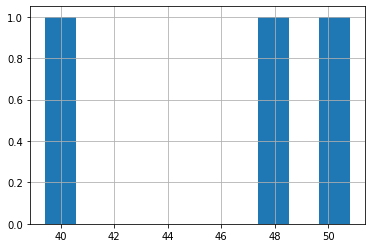

In [3]:
df['total_bill'].hist()

In [4]:
df

,total_bill
0,39.42
1,50.81
2,48.33


## 결측치 제거

In [6]:
# 새출발
import pandas as pd
import pymysql.cursors
import numpy as np

In [9]:
sql="select customers.customerName, payments.checkNumber from customers left join payments on customers.customerNumber=payments.customerNumber where payments.paymentDate >= '2004-10-06';"


In [2]:
# MySQL DB에서 데이터 받아와서 DataFrame에 저장

conn = pymysql.connect(host='localhost', user='root', 
                       password='054867', db='tip', charset='utf8',
                       autocommit=True, cursorclass=pymysql.cursors.DictCursor)

In [3]:
try:

   with conn.cursor() as curs:
      sql="SELECT * FROM tips;"
      curs.execute(sql)
      rs = curs.fetchall()

      # DB에서 받아온 값을 DataFrame에 넣음

      df = pd.DataFrame(rs)
      print(df)

finally:

   conn.close()

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
243       18.78  3.00  Female     No  Thur  Dinner     2
244       16.99  1.01  Female     No   Sun  Dinner     2
245       26.88  3.12    Male     No        Dinner     4
246       26.88  3.12    Male     No        Dinner     4
247       26.88  3.12    Male     No        Dinner     5

[248 rows x 7 columns]


In [11]:
# df.to_csv('query_car.csv')

In [8]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           3
time          0
size          0
dtype: int64

In [7]:
df.replace('',np.nan,inplace=True) 

In [9]:
df.sex.replace({'Female':0,'Male':1},inplace=True)

In [10]:
df.smoker.replace({'No':0,'Yes':1},inplace=True)
df.day.replace({'Thur':0,'Fri':1,'Sat':2,'Sun':3},inplace=True)
df.time.replace({'Lunch':0,'Dinner':1},inplace=True)

In [86]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3.0,1,2
1,10.34,1.66,1,0,3.0,1,3
2,21.01,3.50,1,0,3.0,1,3
3,23.68,3.31,1,0,3.0,1,2
4,24.59,3.61,0,0,3.0,1,4


In [87]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           3
time          0
size          0
dtype: int64

In [13]:
type(df)

pandas.core.frame.DataFrame

In [13]:
# from numpy import isnan
from sklearn.impute import SimpleImputer

In [14]:
data = df.values

In [18]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,248.000000,248.000000,248.000000,248.000000,245.000000,248.000000,248.000000
mean,19.860484,2.991734,0.645161,0.375000,1.730612,0.725806,2.588710
std,8.866048,1.378257,0.479432,0.485102,1.156274,0.447009,0.965075
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.385000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,17.815000,2.960000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,24.527500,3.520000,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [19]:
# flatten() 여러 칼럼을 하나로 합친다. 
sum(np.isnan(data).flatten())

3

In [21]:
imputer = SimpleImputer(strategy='median')

In [22]:
# fit on the dataset
imputer.fit(data)

SimpleImputer(strategy='median')

In [23]:
# transform the dataset
data_trans = imputer.transform(data)

In [24]:
df_trans=pd.DataFrame(data_trans)

In [25]:
df_trans.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

## RFE 적용

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  248 non-null    float64
 1   tip         248 non-null    float64
 2   sex         248 non-null    int64  
 3   smoker      248 non-null    int64  
 4   day         245 non-null    float64
 5   time        248 non-null    int64  
 6   size        248 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 13.7 KB


In [93]:
y=df.total_bill

In [94]:
X=df.drop('total_bill',axis=1)

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,3.0,1,2
1,10.34,1,0,3.0,1,3
2,21.01,1,0,3.0,1,3
3,23.68,1,0,3.0,1,2
4,24.59,0,0,3.0,1,4
...,...,...,...,...,...,...
243,18.78,0,0,0.0,1,2
244,16.99,0,0,3.0,1,2
245,26.88,1,0,NaN,1,4
246,26.88,1,0,NaN,1,4


In [92]:
y.describe()

count    248.000000
mean       2.991734
std        1.378257
min        1.000000
25%        2.000000
50%        2.960000
75%        3.520000
max       10.000000
Name: tip, dtype: float64

In [31]:
data=X.values

In [32]:
y=y.values

In [34]:
sum(np.isnan(data).flatten())

3

In [35]:
sum(np.isnan(y).flatten())

0

In [36]:
imputer = SimpleImputer(strategy='median')

In [37]:
imputer.fit(data)

SimpleImputer(strategy='median')

In [38]:
data_trans=imputer.transform(data)

In [46]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR

In [47]:
estimator=SVR(kernel='linear')

In [48]:
rfe = RFE(estimator, n_features_to_select=4)

In [49]:
data_trans.shape

(248, 6)

In [50]:
rfe.fit(data_trans,y)

RFE(estimator=SVR(kernel='linear'), n_features_to_select=4)

In [51]:
for i in range(X.shape[1]):
  print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=True, Rank: 1
Column: 1, Selected=False, Rank: 3
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=False, Rank: 2
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=True, Rank: 1


In [54]:
X.columns

Index(['tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

## MinMaxScaler

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
trans=MinMaxScaler()

In [57]:
X_norm=trans.fit_transform(data)

In [58]:
df_norm=pd.DataFrame(X_norm)

In [59]:
df_norm.describe()

,0,1,2,3,4,5
count,248.000000,248.000000,248.000000,245.000000,248.000000,248.000000
mean,0.221304,0.645161,0.375000,0.576871,0.725806,0.317742
std,0.153140,0.479432,0.485102,0.385425,0.447009,0.193015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.000000,0.200000
50%,0.217778,1.000000,0.000000,0.666667,1.000000,0.200000
75%,0.280000,1.000000,1.000000,1.000000,1.000000,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## StandardScaler

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc=StandardScaler()

In [62]:
df_sc = sc.fit_transform(data)

In [64]:
df_transform_sc=pd.DataFrame(df_sc)

In [67]:
df_transform_sc.describe().round()

,0,1,2,3,4,5
count,248.0,248.0,248.0,245.0,248.0,248.0
mean,0.0,-0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0
50%,-0.0,1.0,-1.0,0.0,1.0,-1.0
75%,0.0,1.0,1.0,1.0,1.0,0.0
max,5.0,1.0,1.0,1.0,1.0,4.0


In [68]:
data_trans

array([[1.01, 0.  , 0.  , 3.  , 1.  , 2.  ],
       [1.66, 1.  , 0.  , 3.  , 1.  , 3.  ],
       [3.5 , 1.  , 0.  , 3.  , 1.  , 3.  ],
       ...,
       [3.12, 1.  , 0.  , 2.  , 1.  , 4.  ],
       [3.12, 1.  , 0.  , 2.  , 1.  , 4.  ],
       [3.12, 1.  , 0.  , 2.  , 1.  , 5.  ]])

## PCA

In [70]:
from sklearn.decomposition import PCA

In [71]:
trans = PCA(n_components=4)
data_dim = trans.fit_transform(data_trans)

In [75]:
trans.fit(data_dim)

PCA(n_components=4)

In [76]:
trans.explained_variance_ratio_

array([0.50799263, 0.30715882, 0.13516503, 0.04968351])

In [79]:
print(data_dim[:3,:])

[[-1.53513954 -1.85004535 -0.26808275 -0.53483408]
 [-0.49965231 -1.65232642 -0.88420841 -0.15893087]
 [ 1.04473126 -1.04343427 -0.09951337 -0.27676284]]


## 회귀분석

In [80]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [81]:
# define feature selection
fs = SelectKBest(score_func=f_regression, k=4)

In [82]:
# apply feature selection
X_selected = fs.fit_transform(data_trans, y)

In [83]:
print(X_selected.shape)

(248, 4)


In [84]:
pd.DataFrame(X_selected)

,0,1,2,3
0,1.01,3.0,1.0,2.0
1,1.66,3.0,1.0,3.0
2,3.50,3.0,1.0,3.0
3,3.31,3.0,1.0,2.0
4,3.61,3.0,1.0,4.0
...,...,...,...,...
243,3.00,0.0,1.0,2.0
244,1.01,3.0,1.0,2.0
245,3.12,2.0,1.0,4.0
246,3.12,2.0,1.0,4.0
